## Exploring data

In [2]:
#importing necessary libraries

import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

#loading dataset
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

In [3]:
#descriptive stats of the dataset

iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
#checking head of data
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
#see more than the first 5 rows
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [6]:
#checking tail of data
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


## Missing values

In [7]:
#understanding none missing value
import numpy as np

example1 = np.array([2, None, 6, 8])
example1

array([2, None, 6, 8], dtype=object)

In [43]:
#numpy operations like sum(),cannot be performed on this since it reverts to plain python
example1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [ ]:
#arithmetic operations on nan
np.nan + 1

nan

In [ ]:
#detecting missing values
example3 = pd.Series([0, np.nan, '', None])
example3.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [ ]:
#dropping missing values
example3 = example3.dropna()
example3

0    0
2     
dtype: object

In [10]:
#fill missing values
example5 = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
example5

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [11]:
example5.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [12]:
#forward fill (last valid value)
example5.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [13]:
#backward fill (next valid value)
example5.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [44]:
#filling values in a pandas dataframe
example4 = pd.DataFrame([[1,      np.nan, 7], 
                         [2,      5,      8], 
                         [np.nan, 6,      9]])
example4

,0,1,2
0,1.0,NaN,7
1,2.0,5.0,8
2,NaN,6.0,9


In [17]:
#fill missing values with mean
example4.fillna(example4.mean())

,0,1,2
0,1.0,5.5,7
1,2.0,5.0,8
2,1.5,6.0,9


## Dealing and working with duplicate data

In [18]:
example6 = pd.DataFrame({'letters': ['A','B'] * 2 + ['B'],
                         'numbers': [1, 2, 1, 3, 3]})
example6

,letters,numbers
0,A,1
1,B,2
2,A,1
3,B,3
4,B,3


In [45]:
#checking duuplicates
example6.duplicated()

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [46]:
#drop duplicates
example6.drop_duplicates()

,letters,numbers
0,A,1
1,B,2
3,B,3


In [47]:
#dropping duplicates in a column
example6.drop_duplicates(['letters'])


,letters,numbers
0,A,1
1,B,2


## Combining datasets

In [22]:

df1 = pd.DataFrame({'employee': ['Gary', 'Stu', 'Mary', 'Sue'],
                    'group': ['Accounting', 'Marketing', 'Marketing', 'HR']})
df1

,employee,group
0,Gary,Accounting
1,Stu,Marketing
2,Mary,Marketing
3,Sue,HR


In [23]:
df2 = pd.DataFrame({'employee': ['Mary', 'Stu', 'Gary', 'Sue'],
                    'hire_date': [2008, 2012, 2017, 2018]})
df2

,employee,hire_date
0,Mary,2008
1,Stu,2012
2,Gary,2017
3,Sue,2018


In [24]:
#merging two dataframes df1 and df2
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Gary,Accounting,2017
1,Stu,Marketing,2012
2,Mary,Marketing,2008
3,Sue,HR,2018


In [25]:
df4 = pd.DataFrame({'group': ['Accounting', 'Marketing', 'HR'],
                    'supervisor': ['Carlos', 'Giada', 'Stephanie']})
df4

,group,supervisor
0,Accounting,Carlos
1,Marketing,Giada
2,HR,Stephanie


In [27]:
#merging two dataframes on a column
pd.merge(df3, df4, on='group')

,employee,group,hire_date,supervisor
0,Gary,Accounting,2017,Carlos
1,Stu,Marketing,2012,Giada
2,Mary,Marketing,2008,Giada
3,Sue,HR,2018,Stephanie


In [32]:
df6 = pd.DataFrame({'name': ['Gary', 'Stu', 'Mary', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
df6

,name,salary
0,Gary,70000
1,Stu,80000
2,Mary,120000
3,Sue,90000


In [33]:
#merging the df on right
pd.merge(df1, df6, left_on="employee", right_on="name")

,employee,group,name,salary
0,Gary,Accounting,Gary,70000
1,Stu,Marketing,Stu,80000
2,Mary,Marketing,Mary,120000
3,Sue,HR,Sue,90000


In [34]:
#setting a column as the index
df1a = df1.set_index('employee')
df1a

,group
employee,
Gary,Accounting
Stu,Marketing
Mary,Marketing
Sue,HR


In [37]:
df2a = df2.set_index('employee')
df2a

,hire_date
employee,
Mary,2008
Stu,2012
Gary,2017
Sue,2018


In [38]:
df1a.join(df2a)

,group,hire_date
employee,,
Gary,Accounting,2017
Stu,Marketing,2012
Mary,Marketing,2008
Sue,HR,2018


In [39]:
#merging two dataframes on a column and having a left index
pd.merge(df1a, df6, left_index=True, right_on='name')

,group,name,salary
0,Accounting,Gary,70000
1,Marketing,Stu,80000
2,Marketing,Mary,120000
3,HR,Sue,90000


In [40]:
df7 = pd.DataFrame({'name': ['Gary', 'Stu', 'Mary', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df7

,name,rank
0,Gary,1
1,Stu,2
2,Mary,3
3,Sue,4


In [48]:
#merging two dataframes with same column names
df8 = pd.DataFrame({'name': ['Gary', 'Stu', 'Mary', 'Sue'],
                    'rank': [3, 1, 4, 2]})
df8
pd.merge(df7, df8, on='name')

,name,rank_x,rank_y
0,Gary,1,3
1,Stu,2,1
2,Mary,3,4
3,Sue,4,2


In [49]:
#providing suffixes to columns with same name
pd.merge(df7, df8, on='name')
pd.merge(df7, df8, on='name', suffixes=['_left', '_right'])

,name,rank_left,rank_right
0,Gary,1,3
1,Stu,2,1
2,Mary,3,4
3,Sue,4,2


In [50]:
#concatenation in 1d arrays (numpy)
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [51]:
#concatenation in 2d arrays on rows
x = [[1, 2],[3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

In [52]:
#concatenation in 2d arrays on columns
x = [[1, 2],[3, 4]]
np.concatenate([x, x], axis=0)

array([[1, 2],
       [3, 4],
       [1, 2],
       [3, 4]])

In [53]:
#concatenation in pandas
ser1 = pd.Series(['a', 'b', 'c'], index=[1, 2, 3])
ser2 = pd.Series(['d', 'e', 'f'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    a
2    b
3    c
4    d
5    e
6    f
dtype: object

In [54]:
df9 = pd.DataFrame({'A': ['a', 'c'],
                    'B': ['b', 'd']})
df9

,A,B
0,a,b
1,c,d


In [55]:
pd.concat([df9, df9])

,A,B
0,a,b
1,c,d
0,a,b
1,c,d


In [56]:
pd.concat([df9, df9], ignore_index=True)

,A,B
0,a,b
1,c,d
2,a,b
3,c,d


In [57]:
pd.concat([df9, df9], axis=1)

,A,B,A,B
0,a,b,a,b
1,c,d,c,d


In [58]:
#concatenation with joins
df10 = pd.DataFrame({'A': ['a', 'd'],
                     'B': ['b', 'e'],
                     'C': ['c', 'f']})
df10

,A,B,C
0,a,b,c
1,d,e,f


In [59]:
df11 = pd.DataFrame({'B': ['u', 'x'],
                     'C': ['v', 'y'],
                     'D': ['w', 'z']})
df11

,B,C,D
0,u,v,w
1,x,y,z


In [60]:
pd.concat([df10, df11])

,A,B,C,D
0,a,b,c,NaN
1,d,e,f,NaN
0,NaN,u,v,w
1,NaN,x,y,z


In [63]:
df9.append(df9)

,A,B
0,a,b
1,c,d
0,a,b
1,c,d


## Visualization

- CRIM: The per-capita crime rate by town
- ZN: The proportion of residential land zoned for lots larger than 25,000 square feet
- INDUS: The proportion of non-retail business acres per town
- CHAS: The Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxides concentration (parts per 10 million)
- RM: The average number of rooms per dwelling
- AGE: The proportion of owner-occupied units built before 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: The full-value property tax rate per $10,000
- PTRATIO: The pupil-teacher ratio by town
- LSTAT: The percent of the lower-status portion of the population
- MEDV: The median value of owner-occupied homes in $1,000s

In [64]:
#importing dataset
df = pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [65]:
#checking shape of df
df.shape

(506, 14)

In [87]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'AGE_50'],
      dtype='object')

In [66]:
#checking descriptive stats of df
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [70]:
#making a new AGE_50 column where the age is more than 50
df['AGE_50'] = df['AGE'].apply(lambda x: x>50)

In [71]:
groupby_twovar=df.groupby(['AGE_50','RAD','CHAS'])['MEDV'].mean()

In [72]:
groupby_twovar

AGE_50  RAD  CHAS
False   1    0.0     23.833333
             1.0     50.000000
        2    0.0     31.100000
        3    0.0     26.611765
        4    0.0     25.013636
             1.0     32.900000
        5    0.0     25.921053
             1.0     37.200000
        6    0.0     23.575000
        7    0.0     28.563636
        8    0.0     32.400000
        24   0.0     21.750000
True    1    0.0     21.566667
        2    0.0     24.700000
        3    0.0     29.350000
             1.0     27.950000
        4    0.0     17.840000
             1.0     21.560000
        5    0.0     25.428125
             1.0     25.028571
        6    0.0     19.718750
        7    0.0     25.620000
        8    0.0     31.092308
             1.0     26.000000
        24   0.0     14.966972
             1.0     31.362500
Name: MEDV, dtype: float64

In [73]:
groupby_twovar.unstack()

CHAS              0.0        1.0
AGE_50 RAD                      
False  1    23.833333  50.000000
       2    31.100000        NaN
       3    26.611765        NaN
       4    25.013636  32.900000
       5    25.921053  37.200000
       6    23.575000        NaN
       7    28.563636        NaN
       8    32.400000        NaN
       24   21.750000        NaN
True   1    21.566667        NaN
       2    24.700000        NaN
       3    29.350000  27.950000
       4    17.840000  21.560000
       5    25.428125  25.028571
       6    19.718750        NaN
       7    25.620000        NaN
       8    31.092308  26.000000
       24   14.966972  31.362500

In [74]:
df['CHAS'].nunique()

2

<AxesSubplot:>

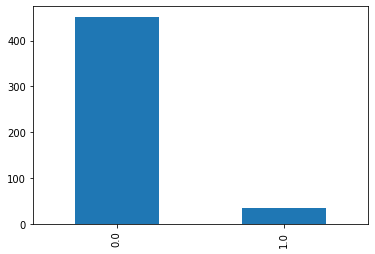

In [76]:
df['CHAS'].value_counts().plot(kind='bar')

In [77]:
df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,AGE_50
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363,0.252000
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136,-0.543068
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772,0.463167
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391,0.068715
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321,0.543056
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360,-0.166270
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656,0.867161
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929,-0.614457
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626,0.348986
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536,0.363020


In [78]:
corr = df.corr(method='pearson')
corr_with_homevalue = corr.iloc[-1]
corr_with_homevalue[corr_with_homevalue.argsort()[::-1]]

AGE_50     1.000000
AGE        0.867161
NOX        0.543056
INDUS      0.463167
LSTAT      0.437122
TAX        0.363020
RAD        0.348986
CRIM       0.252000
PTRATIO    0.228044
CHAS       0.068715
RM        -0.166270
B         -0.186332
MEDV      -0.286880
ZN        -0.543068
DIS       -0.614457
Name: AGE_50, dtype: float64

<AxesSubplot:>

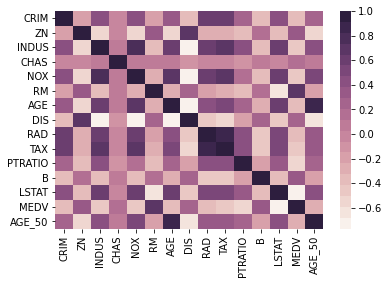

In [79]:
import seaborn as sns
sns.heatmap(df.corr(),cmap=sns.cubehelix_palette(20, light=0.95, dark=0.15))

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

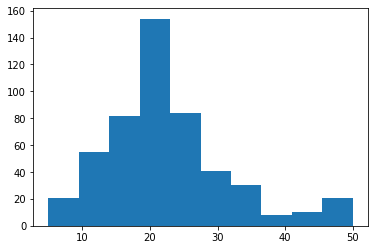

In [80]:
import matplotlib.pyplot as plt
plt.hist(df['MEDV'])

(array([ 3.,  1.,  7.,  7.,  3.,  6.,  8., 10.,  8., 23., 15., 19., 14.,
        16., 18., 28., 36., 29., 33., 28., 37., 21., 15.,  4.,  7., 11.,
         9.,  9.,  5.,  7.,  7.,  8.,  2.,  8.,  5.,  4.,  2.,  1.,  1.,
         0.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  0.,  3., 16.]),
 array([ 5. ,  5.9,  6.8,  7.7,  8.6,  9.5, 10.4, 11.3, 12.2, 13.1, 14. ,
        14.9, 15.8, 16.7, 17.6, 18.5, 19.4, 20.3, 21.2, 22.1, 23. , 23.9,
        24.8, 25.7, 26.6, 27.5, 28.4, 29.3, 30.2, 31.1, 32. , 32.9, 33.8,
        34.7, 35.6, 36.5, 37.4, 38.3, 39.2, 40.1, 41. , 41.9, 42.8, 43.7,
        44.6, 45.5, 46.4, 47.3, 48.2, 49.1, 50. ]),
 <BarContainer object of 50 artists>)

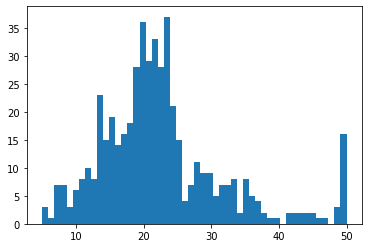

In [81]:
plt.hist(df['MEDV'],bins=50)

C:\Users\vidus\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

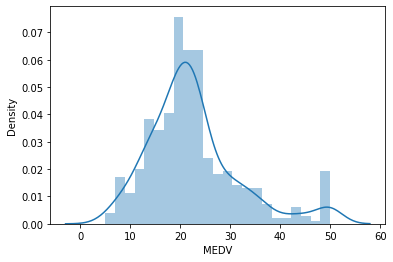

In [82]:
sns.distplot(df['MEDV'])

C:\Users\vidus\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


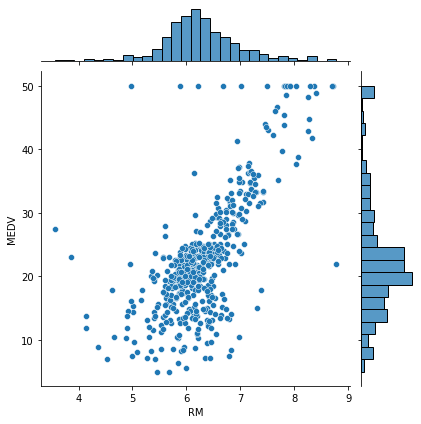

In [83]:
sns.jointplot(df['RM'], df['MEDV'], kind='scatter')

C:\Users\vidus\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


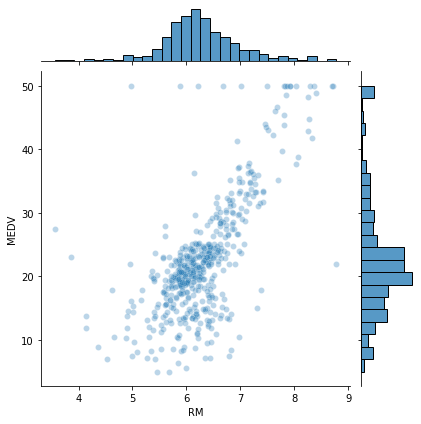

In [84]:
sns.jointplot(df['RM'], df['MEDV'], kind='scatter', alpha=0.3)

C:\Users\vidus\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RM', ylabel='MEDV'>

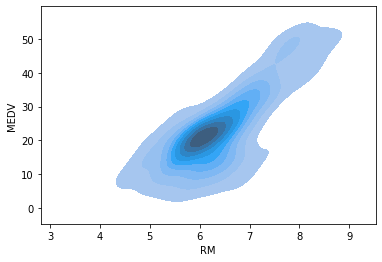

In [85]:
sns.kdeplot(df['RM'], df['MEDV'], shade=True)

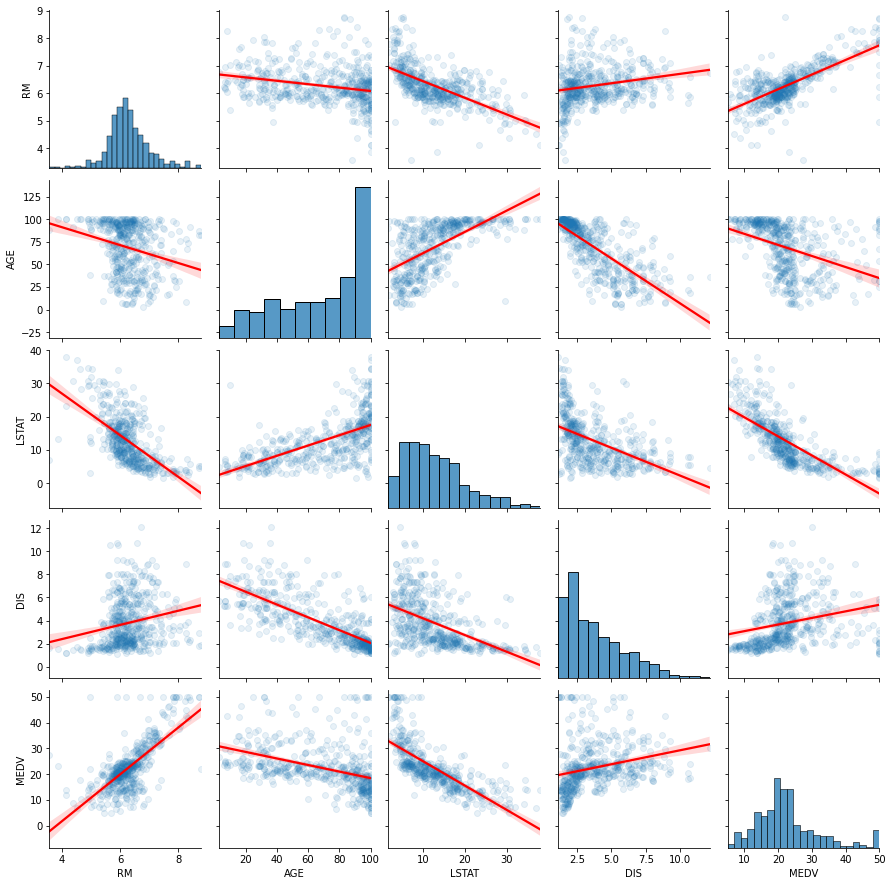

In [86]:
sns.pairplot(df[['RM', 'AGE', 'LSTAT', 'DIS', 'MEDV']], kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})